In [1]:
from eval.trainVAE import VAEEval
v = VAEEval()

In [2]:
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN,Birch
from sklearn.metrics import calinski_harabasz_score

In [3]:
fe = v.feature_extractor
data = v.data_set.ext_df.tolist()
_pred = v.data_set.tag_ids.tolist()
ori = v.data_set.ori_df

In [4]:
len(v.data_set)

1817

In [5]:
v.data_set.ori_df.iloc[0,0]

'socialyzer social medium optimization service powerful user analysis tool client engagement campaign social medium coordinator use socialyzer automate tweet post moment optimum audience engagement socialyzer expose service entire functionality allow business social medium account socialyzer function restful api return json encode data powerful powerful business business business business functionality functionality use use social social social social tool tool tool encode analysis analysis optimum optimum data data user user tweet service service service account account automate automate allow allow engagement engagement medium medium campaign campaign return post post function function entire entire audience audience expose client client client moment moment optimization optimization optimization optimization api coordinator'

In [6]:
v.data_set.ori_df.iloc[0,2]

'social organism include human live collectively interacting population interaction consider social whether aware whether interaction voluntary involuntary business activity make one live make money produce buy selling product good service need quotation verify simply put activity enterprise enter profit mean company corporation partnership formal organization range street peddler general motor marketing profitably use result study short term long term need pay one time case steady flow service product placement new york time described art tell story enthral people lose track wallet mathematical optimization alternatively spell optimisation mathematical programming selection best element regard criterion set available alternative optimization problem sort arise quantitative discipline computer science engineering operation research economics development solution method interest mathematics century'

In [7]:
v.train()

epoch:0,loss:22671099.5
tensor(72.2358, device='cuda:0', grad_fn=<SumBackward0>)
epoch:1,loss:22671027.5
epoch:2,loss:22671020.5
epoch:3,loss:22671018.25
epoch:4,loss:22671017.75
epoch:5,loss:22671016.75
epoch:6,loss:22671015.5
epoch:7,loss:22671015.5
epoch:8,loss:22671015.5
epoch:9,loss:22671015.5
epoch:10,loss:22671015.5
tensor(73.3397, device='cuda:0', grad_fn=<SumBackward0>)
epoch:11,loss:22671015.5
epoch:12,loss:22671015.5
epoch:13,loss:22671015.5
epoch:14,loss:22671015.5
epoch:15,loss:22671015.5
epoch:16,loss:22671015.5
epoch:17,loss:22671015.5
epoch:18,loss:22671015.5
epoch:19,loss:22671015.5
epoch:20,loss:22671015.5
tensor(74.9209, device='cuda:0', grad_fn=<SumBackward0>)
epoch:21,loss:22671015.5
epoch:22,loss:22671015.5
epoch:23,loss:22671015.5
epoch:24,loss:22671015.5
epoch:25,loss:22671015.5
epoch:26,loss:22671015.5
epoch:27,loss:22671015.5
epoch:28,loss:22671015.5
epoch:29,loss:22671015.5
epoch:30,loss:22671015.5
tensor(77.3138, device='cuda:0', grad_fn=<SumBackward0>)
epoc

In [11]:
# fe = t.vae
# _,theta,*_ = fe(data,pred=_pred)
_,theta,*_ = fe(data)

In [12]:
def do_tsne(X):
    tsne = TSNE(n_components=2)
    new_x = tsne.fit_transform(X)
    return new_x,tsne

In [13]:
t,tsne = do_tsne(theta.cpu().detach())

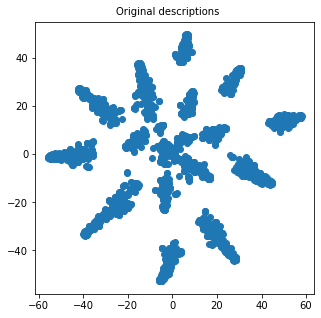

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure('enriched',(5,5))
fig.text(0.35,0.9,'Original descriptions')
ax = fig.add_subplot(111)
ax.scatter(t[:,0],t[:,1])
fig.show()

In [15]:
from sklearn.cluster import KMeans,DBSCAN
km = KMeans()
db = DBSCAN()

In [13]:
r1 = km.fit_predict(t)
r2 = db.fit_predict(theta.cpu().detach())

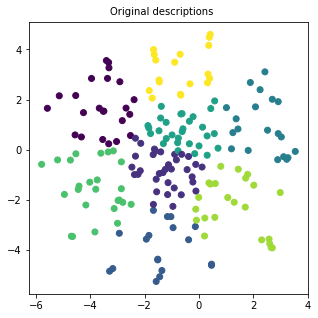

In [14]:
import matplotlib.pyplot as plt
fig = plt.figure('enriched',(5,5))
fig.text(0.35,0.9,'Original descriptions')
ax = fig.add_subplot(111)
ax.scatter(t[:,0],t[:,1],c=r1)

fig.show()

In [10]:
ori[r1==1]

NameError: name 'r1' is not defined

In [10]:
from eval.TagLSTMEval_topic import LSTMEval
model = LSTMEval()

In [ ]:
model.train()

epoch:0,loss:8.130449645221233


/home/ubuntu/yl/ylSim/experiment/eval/tag_generic.py:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  seq = torch.tensor(seq).to(float)


{'p': {1: 0.4517766497461929, 5: 0.38984771573604066, 10: 0.34091934574168087, 15: 0.3513736968051689, 20: 0.3611446243143057}, 'r': {1: 0.028081360228624876, 5: 0.11160929423254067, 10: 0.1759719749816995, 15: 0.2309845769050646, 20: 0.2744401338799804}, 'f': {1: 0.05140732249593513, 5: 0.15750037321545787, 10: 0.2123256458914268, 15: 0.2630925209263299, 20: 0.30093097795039736}, 'n': {1: 0.4174215445948328, 5: 0.43414212137609776, 10: 0.42693505974083296, 15: 0.4584435964689179, 20: 0.47990850002939356}}
epoch:1,loss:6.371003743261099
{'p': {1: 0.5076142131979695, 5: 0.42233502538071077, 10: 0.38520667150108784, 15: 0.3848822779025825, 20: 0.3977329645771522}, 'r': {1: 0.03103437245674553, 5: 0.12348717656161362, 10: 0.19727644900010627, 15: 0.2520664618880766, 20: 0.3020777653213532}, 'f': {1: 0.05674943521299471, 5: 0.17388225258871295, 10: 0.23872636108287323, 15: 0.2873758727974942, 20: 0.33116492761368643}, 'n': {1: 0.46830580544460887, 5: 0.47340075940021903, 10: 0.477459495145

In [ ]:
torch.autograd.set_grad_enabled(False)

for id1,id2,l in model.train_data_loader:
    break
in1 = model.get_BoWs(id1)    
in2 = model.ext_df[id2]
text2 = model.data_set[id2]

In [ ]:
positives = torch.sort(l,descending=True)[1]

In [ ]:
import torch
f1,w1 = model.feature_extractor([torch.LongTensor(s) for s in id1],in1,model.vae)

In [ ]:
k = positives[2].item()
w1[k]

In [100]:
[model.di.id2token[_i] for _i in id1[k]]

['marketing', 'analytics', 'enterprise']

In [101]:
f2,w2 = model.feature_extractor(text2,in2,model.vae)

In [ ]:
[model.di.id2token[_i] for _i in text2.iloc[k].numpy().tolist()]

In [103]:
word_mask = (w2[k]>0.5).squeeze()[:len(text2.iloc[k])]

In [104]:
[model.di.id2token[_i] for _i in text2.iloc[k][word_mask].numpy().tolist()]

['enterprise',
 'enterprise',
 'enterprise',
 'enterprise',
 'enterprise',
 'dashboard',
 'dashboard',
 'dashboard',
 'dashboard',
 'dashboard',
 'market',
 'marketing',
 'marketing',
 'marketing',
 'analytics',
 'analytics',
 'dashboard',
 'dashboard']

In [105]:
model.cos(f1,f2)[k]

tensor(0.5149, device='cuda:0', grad_fn=<SelectBackward>)

In [117]:
for id1 in model.test_keys:
    break
pos = list(model.data_set.pos[id1][1])
text_bow = model.get_BoWs([model.data_set.pos[id1][0]])
text = [torch.LongTensor(model.data_set.pos[id1][0])]

In [120]:
[model.di.id2token[_i] for _i in text[0].numpy()]

['mobile', 'message', 'usa']

In [123]:
all_f = []
for _ids in model.ids_loader:
    _t = model.data_set[_ids.cpu().numpy()]
#   _b = self.bow[_ids.cpu().numpy()]
    _b = model.ext_df[_ids.cpu().numpy()]
    _f,*_ = model.feature_extractor(_t,_b,model.vae)

    all_f.append(_f.cpu())
all_f = torch.cat(all_f,dim = 0).view(len(model.data_set),-1)

RuntimeError: CUDA out of memory. Tried to allocate 502.00 MiB (GPU 0; 10.92 GiB total capacity; 9.47 GiB already allocated; 125.94 MiB free; 10.10 GiB reserved in total by PyTorch)

In [124]:
torch.cuda.empty_cache()